<a href="https://colab.research.google.com/github/MonitSharma/Learn-Machine-Learning-with-Me/blob/main/Introduction_to_Computational_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computational Graph with PyTorch

In this notebook we will have a short introduction and overview of computational graphs using PyTorch.

It's better to learn topics, specifically in ML by doing practical examples.

# Getting Started

Lwt's look at the following expression $e = (a+b) \times (b+1)$. It helps to break down the expression as follows:

$$c = a+b$$
$$ d = b+1$$
$$ e = c \times d$$

This is not a neural network, we are just going through a very simple example on chain of operations and how are they represented with the help of computational graphs.


It would help us more if we try to visualize the computational graph. Computational graphs contains nodes which can represent and input or operation that can be the input to another node. The nodes are connected by edges, which represent a function argument, they are pointers to nodes. Note that the computation graphs are directed and acyclic. The computational graph for our example looks like:



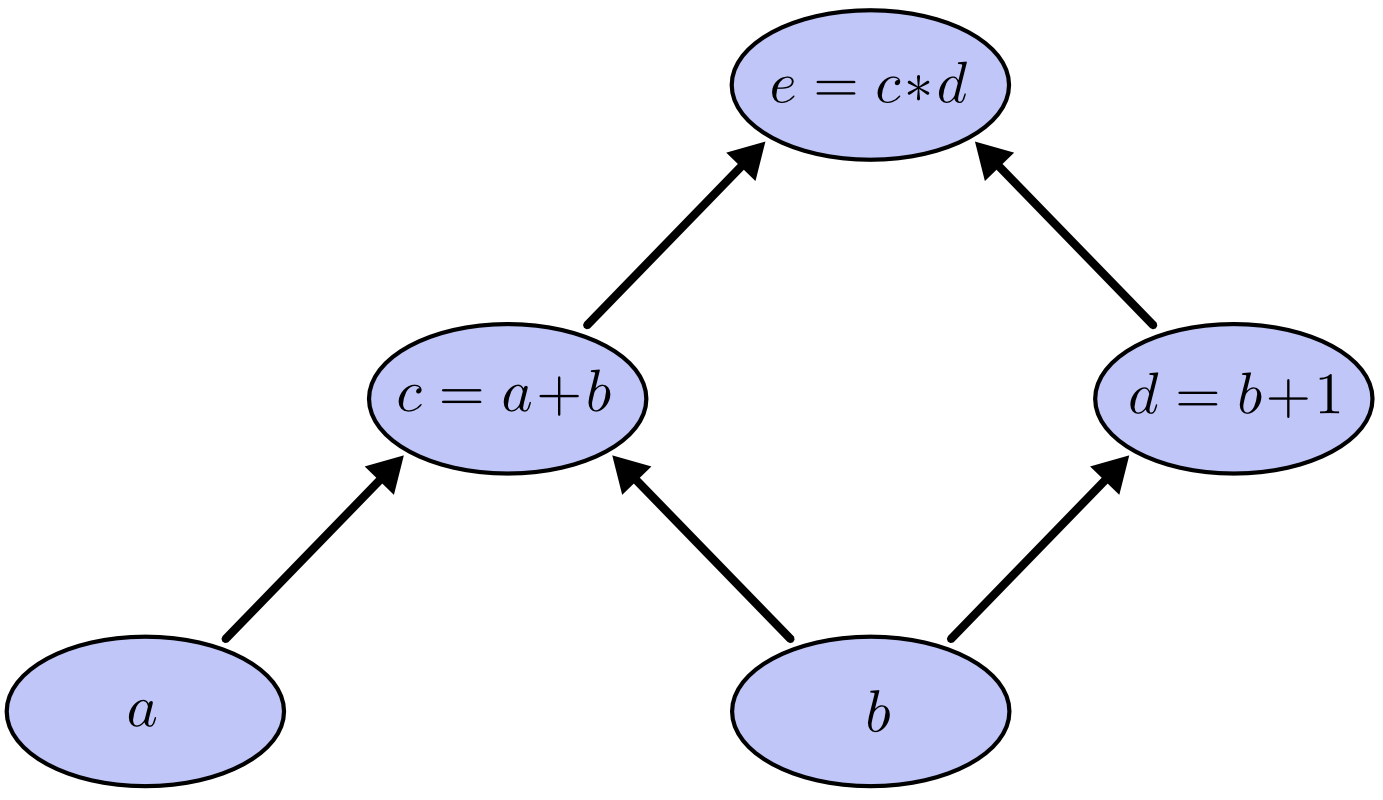

We can evaluate the expression by setting our input as follows:
$a=2$ and $b=1$. This will allow us to compute nodes up through the graph as shown in the computational graph above.

Rather than doing this by hand, we can use the automatic differentiation engine provided by PyTorch.


Install and import PyTorch first:

In [2]:
import torch

Define the inputs like this:

In [10]:
a = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

Note that we used `requires_grad=True` to tell the autograd engine that ebery operation on them should be tracked.

These are the operations in code:

In [13]:
c = a + b
d = b + 1
e = c * d


# grads populated for non-leaf nodes

c.retain_grad()
d.retain_grad()
e.retain_grad()

Note that we used `.retain_grad()` to allow gradients to be stored for non-leaf nodes as we are interested in inspecting those as well.

Now, that we have our computational graph, we can check the result when evaluating the expression:

In [14]:
print(e)

tensor([6.], grad_fn=<MulBackward0>)


The output is a tensor with the value of `6.`, which verifies the result here:

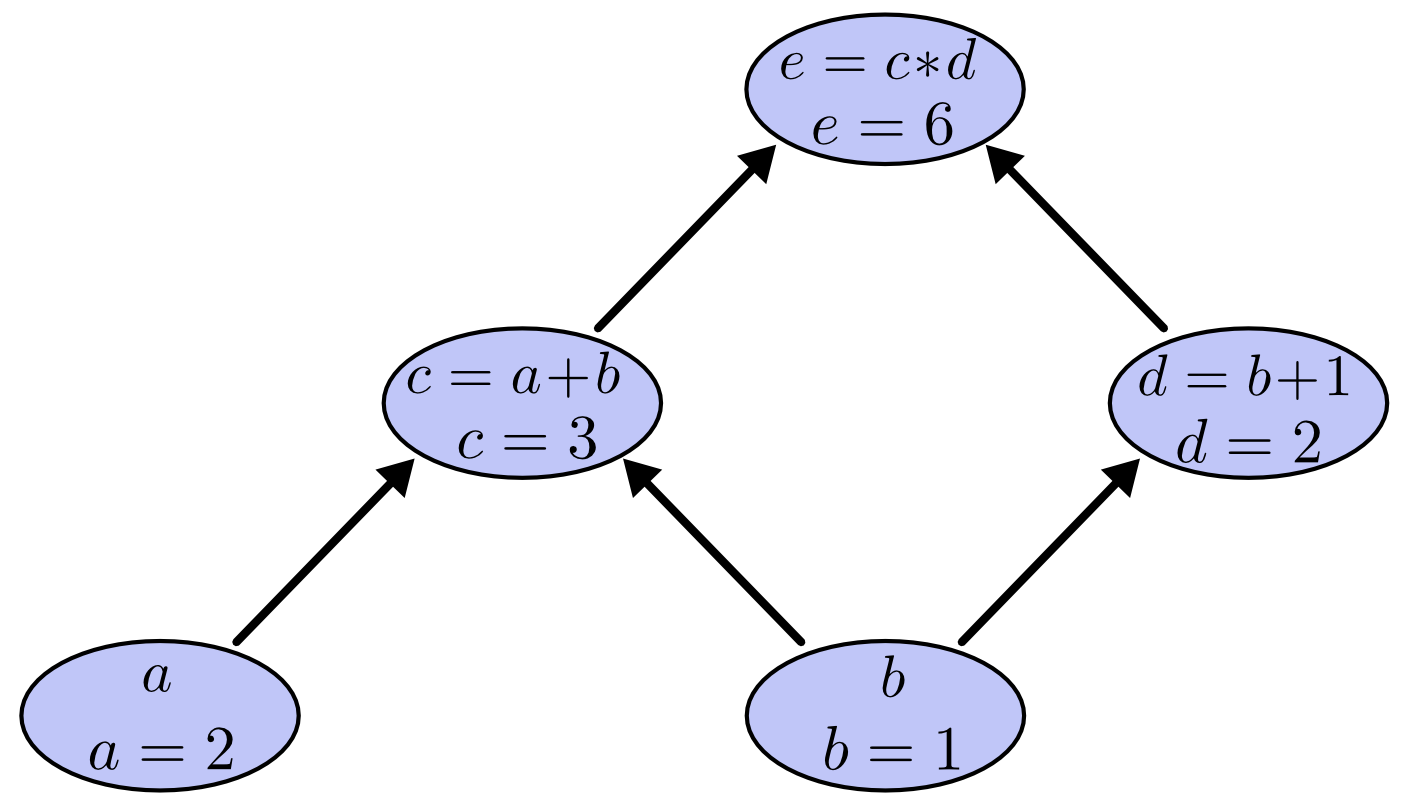

## Derivatives on Computational Graphs

Using the concept of computational graphs we are now interested in evaluating the **partial derivatives** of the edges of the graph. This will help in gathering the gradients of the graph. Remember that gradients are what we use to train the neural network and those calculations can be taken care of by the automatic differentation engine. 

The intuition is: we want to know, for example, if $a$ directly affects $c$, how does it affect it. In other words, if we change $a$ a little, how does $c$ change. This is referred to as the partial derivative of $c$ with respect to $a$.

You can work this by hand, but the easy way to do this with PyTorch is by calling `.backward()` on $e$ and let the engine figure out the values. The `.backward()` signals the autograd engine to calculate the gradients and store them in the respective tensors’ `.grad` attribute.

Let's do that now:

In [15]:
e.backward()

Now, let's say that we are interested in the derivative of $e$ with respect to $a$ , how do we obtain this?

$$\frac{\partial e}{\partial a}$$


Using PyTorch we can do this, we have to call `a.grad`:

In [16]:
print(a.grad)

tensor([2.])


But what is the intuition behind this:

>Let’s consider how $e$ is affected by $a$. If we change $a$ at a speed of 1, $c$ also changes at a speed of $1$. In turn, $c$ changing at a speed of $1$ causes $e$ to change at a speed of $2$. So $e$ changes at a rate of $1*2$ with respect to $a$.


In other words, we have:

$$
\frac{\partial e}{\partial \boldsymbol{a}}=\frac{\partial e}{\partial \boldsymbol{c}} \frac{\partial \boldsymbol{c}}{\partial \boldsymbol{a}} = 2 * 1
$$

We can verify this by checking the manual calculations. Since $a$ is not directly connected to $e$, we can use some special rule which allows to sum over all paths from one node to the other in the computational graph and multiplying the derivatives on each edge of the path together.

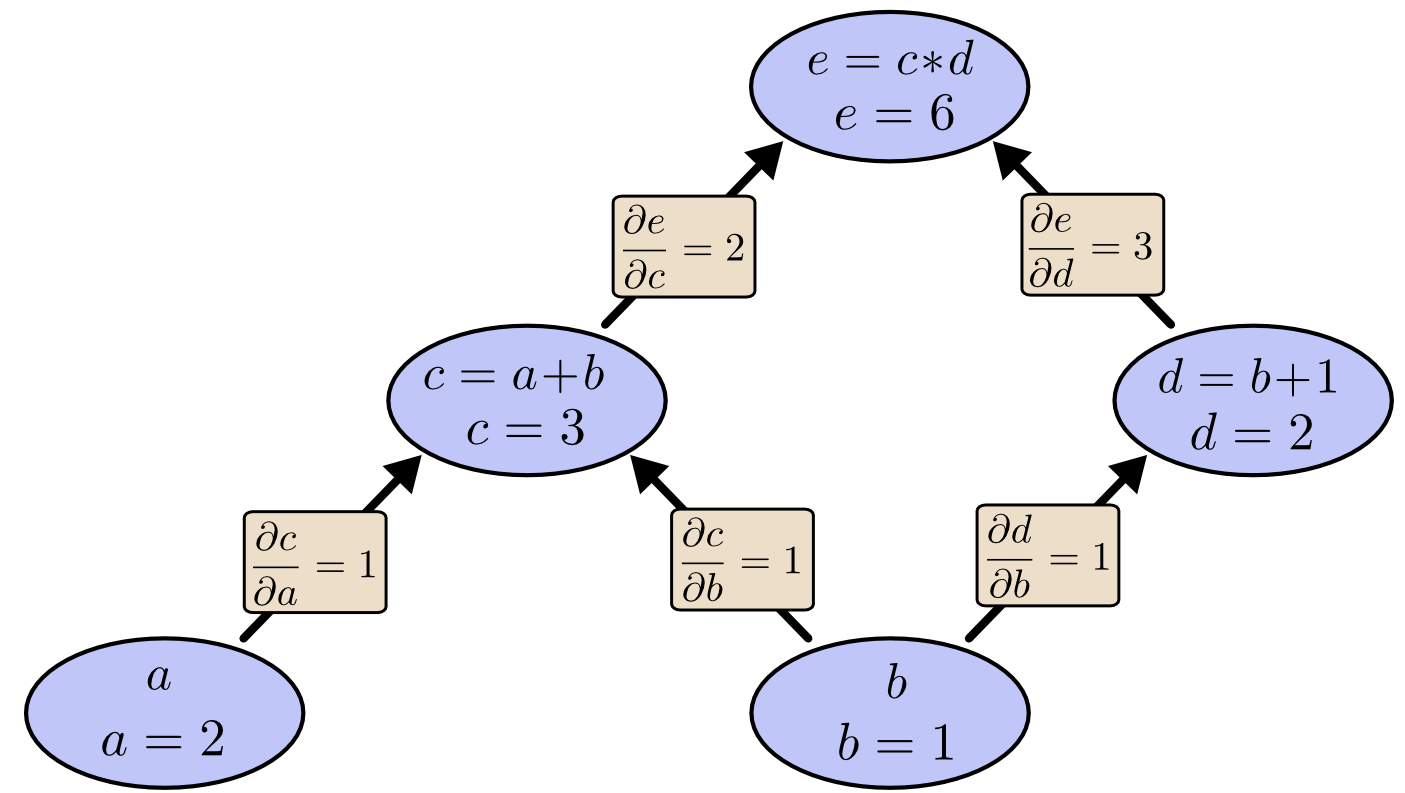

To check that this holds , let's loo at other example, let's find $\frac{\partial e}{\partial b}$

We can get that through `b.grad`:

In [17]:
print(b.grad)

tensor([5.])


If you work it out by hand, you are basically doing the following:

$$
\frac{\partial e}{\partial b}=1 * 2+1 * 3
$$

It indicates how $b$ affects $e$ through $c$ and $d$. We are essentially summing over paths in the computational graph.

Here are all the gradients collected , including non-leaf nodes:

In [18]:
print(a.grad, b.grad, c.grad, d.grad, e.grad)

tensor([2.]) tensor([5.]) tensor([2.]) tensor([3.]) tensor([1.])


You can use the computational graph above to verify that everything is correct. This is the power of computational graphs and how they are used by automatic differentation engines. It's also a very useful concept to understand when developing neural networks architectures and their correctness.

### Summary
Here we got the intuitive explaination to the concept of computational graphs using PyTorch.

Next we will apply the concept of computational graphs to more advanced operations you typically see in a neural network.